In [9]:
import utilities as utils

In [10]:
data_path_1: str = './synthetic/'   
data_path_2: str = '../../../Data/phase2/'   

data_set_1: list = [ 'smote_application_30000.csv', 
                     'smote_application_upsample_to_majority.csv',
                     'smote_traffic_30_20_10.csv',
                     'smote_traffic_upsample_to_majority.csv']

data_set_2: list = [ 'Traffic_type_test.csv', 'Application_type_test.csv' ] 


file_path_1       = utils.get_file_path(data_path_1)
file_path_2       = utils.get_file_path(data_path_2)
file_set_1 : list = list(map(file_path_1, data_set_1))
file_set_2 : list = list(map(file_path_2, data_set_2))

file_set : list   = file_set_1 + file_set_2 
data_set   : list = data_set_1 + data_set_2 
current_job: int  = 0

utils.data_set = data_set
utils.file_set = file_set

In [11]:
print(f'We will be using {len(file_set)} files:')
utils.pretty(file_set)

We will be using 6 files:
[   './synthetic/smote_application_30000.csv',
    './synthetic/smote_application_upsample_to_majority.csv',
    './synthetic/smote_traffic_30_20_10.csv',
    './synthetic/smote_traffic_upsample_to_majority.csv',
    '../../../Data/phase2/Traffic_type_test.csv',
    '../../../Data/phase2/Application_type_test.csv']


In [15]:
smote_balanced_application_dataset_labels_30_30_30 = utils.examine_dataset(1)
smote_balanced_application_dataset_labels_equal = utils.examine_dataset(2)
smote_balanced_traffic_labels_dataset_30_20_10 = utils.examine_dataset(3)
smote_balanced_traffic_labels_dataset_equal = utils.examine_dataset(4)
baseline_traffic_test = utils.examine_dataset(5)
baseline_application_test = utils.examine_dataset(6)

Dataset 1/6: We now look at ./synthetic/smote_application_30000.csv


Loading Dataset: ./synthetic/smote_application_30000.csv
	To Dataset Cache: ./cache/smote_application_30000.csv.pickle


        File:				./synthetic/smote_application_30000.csv  
        Job Number:			1
        Shape:				(240000, 64)
        Samples:			240000 
        Features:			64
    
Dataset 2/6: We now look at ./synthetic/smote_application_upsample_to_majority.csv


Loading Dataset: ./synthetic/smote_application_upsample_to_majority.csv
	To Dataset Cache: ./cache/smote_application_upsample_to_majority.csv.pickle


        File:				./synthetic/smote_application_upsample_to_majority.csv  
        Job Number:			2
        Shape:				(384160, 64)
        Samples:			384160 
        Features:			64
    
Dataset 3/6: We now look at ./synthetic/smote_traffic_30_20_10.csv


Loading Dataset: ./synthetic/smote_traffic_30_20_10.csv
	To Dataset Cache: ./cache/smote_traffic_30_20_10.csv.pickle


        File:				./synthetic/smo

In [16]:
smote_balanced_application_30_30_30 : dict = utils.package_data_for_inspection_with_label(
                                                            utils.prune_dataset(smote_balanced_application_dataset_labels_30_30_30, ['Traffic Type']), 'Application_Dataset_30_30_30')
smote_balanced_application_majority : dict = utils.package_data_for_inspection_with_label(
                                                            utils.prune_dataset(smote_balanced_application_dataset_labels_equal, ['Traffic Type']), 'Application_Dataset_majority')
smote_balanced_traffic_30_20_10     : dict = utils.package_data_for_inspection_with_label(
                                                            utils.prune_dataset(smote_balanced_traffic_labels_dataset_30_20_10, ['Application Type']), 'Traffic_Dataset_30_20_10')
smote_balanced_traffic_majority     : dict = utils.package_data_for_inspection_with_label(
                                                            utils.prune_dataset(smote_balanced_traffic_labels_dataset_equal, ['Application Type']), 'Traffic_Dataset_majority')
baseline_traffic_test               : dict = utils.package_data_for_inspection_with_label(
                                                            utils.prune_dataset(baseline_traffic_test, ['Application Type']), 'Traffic_Dataset_test')
baseline_application_test           : dict = utils.package_data_for_inspection_with_label(
                                                            utils.prune_dataset(baseline_application_test, ['Traffic Type']), 'Application_Dataset_test')


        Shape:				(240000, 63)
        Samples:			240000 
        Features:			63
    

        Shape:				(384160, 63)
        Samples:			384160 
        Features:			63
    

        Shape:				(60000, 63)
        Samples:			60000 
        Features:			63
    

        Shape:				(277977, 63)
        Samples:			277977 
        Features:			63
    

        Shape:				(1950, 63)
        Samples:			1950 
        Features:			63
    

        Shape:				(4000, 63)
        Samples:			4000 
        Features:			63
    


In [17]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


# Experimenting with Resnet

Layer sizes: [64, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 3], length: 22
Number of residual blocks: 19
Residual locations:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Better model found at epoch 0 with f1_score value: 0.9218478103609562.
Better model found at epoch 1 with f1_score value: 0.953551477471931.
Better model found at epoch 2 with f1_score value: 0.9616969063414245.
Better model found at epoch 3 with f1_score value: 0.9630873852357249.
Better model found at epoch 4 with f1_score value: 0.9648021421016771.
Better model found at epoch 5 with f1_score value: 0.9679959916544169.
Better model found at epoch 6 with f1_score value: 0.9729342065926829.
Better model found at epoch 0 with f1_score value: 0.9768119930521505.
loss: 0.0750046819448471, accuracy:  97.73%


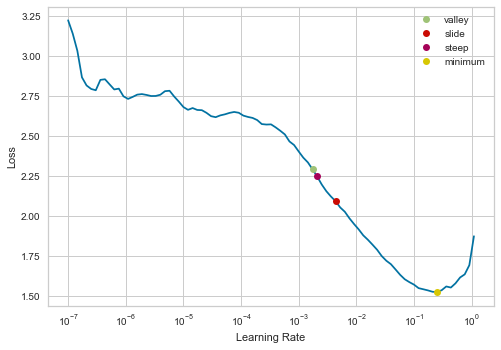

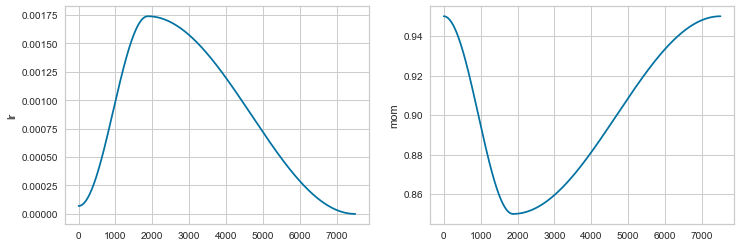

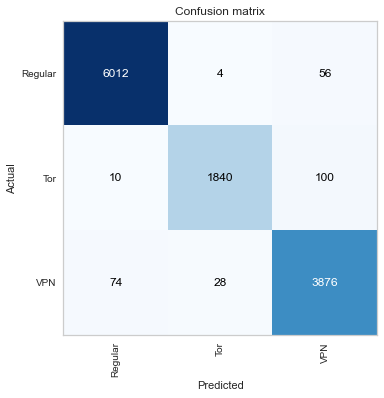

In [18]:
logger_1 = utils.DFLogger()
collector_1 = utils.ModelStatsCallback()
grapher_1 = utils.LazyGraphCallback()
model_saver_1 = utils.SaveModelCallback(monitor='f1_score')
callbacks_1 = [logger_1, grapher_1, model_saver_1, collector_1]

dnn_result = utils.run_residual_deep_nn_experiment(smote_balanced_traffic_30_20_10['Dataset'], 'Residual Neural Network', 'Traffic Type', list(100 for _ in range(20)), epochs=10, callbacks=callbacks_1, no_bar=True)

In [21]:
logger_1.df

,epoch,train_loss,valid_loss,accuracy,balanced_accuracy_score,roc_auc_score,matthews_corrcoef,f1_score,precision_score,recall_score,time
0,0,0.222826,0.212906,0.927667,0.919686,0.982737,0.881309,0.921848,0.924703,0.919686,00:34
1,1,0.143430,0.130448,0.960000,0.951334,0.992646,0.934103,0.953551,0.955895,0.951334,00:37
2,2,0.113824,0.106104,0.968083,0.960867,0.994616,0.947444,0.961697,0.962594,0.960867,00:34
3,3,0.084098,0.105227,0.968333,0.961256,0.994345,0.947884,0.963087,0.965063,0.961256,00:33
4,4,0.085465,0.095989,0.970667,0.962676,0.995844,0.951707,0.964802,0.967081,0.962676,00:34
5,5,0.067128,0.088005,0.973583,0.962999,0.996177,0.956485,0.967996,0.973576,0.962999,00:34
6,6,0.065163,0.075005,0.977333,0.969356,0.996987,0.962665,0.972934,0.976812,0.969356,00:34
7,7,0.058755,0.089359,0.973917,0.964758,0.995378,0.957019,0.967771,0.970976,0.964758,00:34
8,8,0.052834,0.075642,0.977333,0.968254,0.996976,0.962649,0.971341,0.974620,0.968254,00:33
9,9,0.059370,0.070974,0.977500,0.968335,0.997360,0.962927,0.971859,0.975643,0.968335,00:30


In [22]:
new_dls = dnn_result.dls.test_dl(baseline_traffic_test['Dataset'], bs=64)

prediction = dnn_result.model.predict(new_dls.xs)
prediction_prob = dnn_result.model.predict_proba(new_dls.xs)
print(f'Results for {dnn_result.name}. Acc: {utils.accuracy_score(new_dls.y, prediction)}, F1: {utils.f1_score(new_dls.y, prediction, average="weighted")}, AUC: {utils.roc_auc_score(new_dls.y, prediction_prob, multi_class="ovr")}, MCC: {utils.matthews_corrcoef(new_dls.y, prediction)}')


Results for Residual Neural Network. Acc: 0.4523076923076923, F1: 0.44369332470853456, AUC: 0.6494461538461539, MCC: 0.1854358210465507


Accuracy: 0.4523076923076923


ConfusionMatrix(ax=<AxesSubplot:>, classes=['Regular', 'Tor', 'VPN'],
                cmap=<matplotlib.colors.ListedColormap object at 0x000001729CC63B48>,
                estimator=SklearnWrapper(model=<fastai.tabular.learner.TabularLearner object at 0x000001728C469188>))

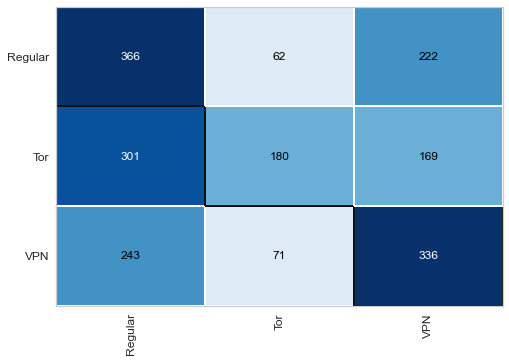

In [26]:
utils.confusion_matrix_from_dataset(dnn_result, baseline_traffic_test['Dataset'], ax=None, cmap='Blues')


In [23]:
logger_1.df

,epoch,train_loss,valid_loss,accuracy,balanced_accuracy_score,roc_auc_score,matthews_corrcoef,f1_score,precision_score,recall_score,time
0,0,0.222826,0.212906,0.927667,0.919686,0.982737,0.881309,0.921848,0.924703,0.919686,00:34
1,1,0.143430,0.130448,0.960000,0.951334,0.992646,0.934103,0.953551,0.955895,0.951334,00:37
2,2,0.113824,0.106104,0.968083,0.960867,0.994616,0.947444,0.961697,0.962594,0.960867,00:34
3,3,0.084098,0.105227,0.968333,0.961256,0.994345,0.947884,0.963087,0.965063,0.961256,00:33
4,4,0.085465,0.095989,0.970667,0.962676,0.995844,0.951707,0.964802,0.967081,0.962676,00:34
5,5,0.067128,0.088005,0.973583,0.962999,0.996177,0.956485,0.967996,0.973576,0.962999,00:34
6,6,0.065163,0.075005,0.977333,0.969356,0.996987,0.962665,0.972934,0.976812,0.969356,00:34
7,7,0.058755,0.089359,0.973917,0.964758,0.995378,0.957019,0.967771,0.970976,0.964758,00:34
8,8,0.052834,0.075642,0.977333,0.968254,0.996976,0.962649,0.971341,0.974620,0.968254,00:33
9,9,0.059370,0.070974,0.977500,0.968335,0.997360,0.962927,0.971859,0.975643,0.968335,00:30


Results for LDA
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      6072
           1       0.97      0.88      0.92      1950
           2       0.86      0.87      0.86      3978

    accuracy                           0.90     12000
   macro avg       0.91      0.89      0.90     12000
weighted avg       0.90      0.90      0.90     12000

	Accuracy: 0.90225

	F1: 0.9024096584487922

	AUC: 0.9672720387512793

	Mathew's Correlation: 0.8382705410029448

Layer sizes: [64, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 3], length: 42
Number of residual blocks: 39
Residual locations:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
Better model found at epoch 0 with f1_score value: 0.8216

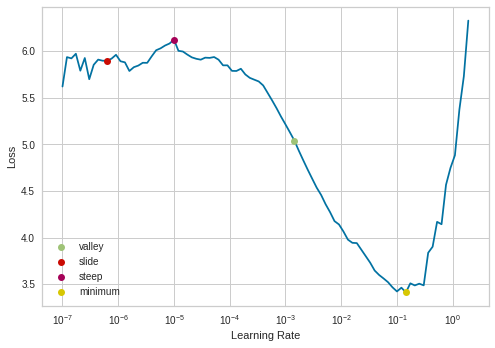

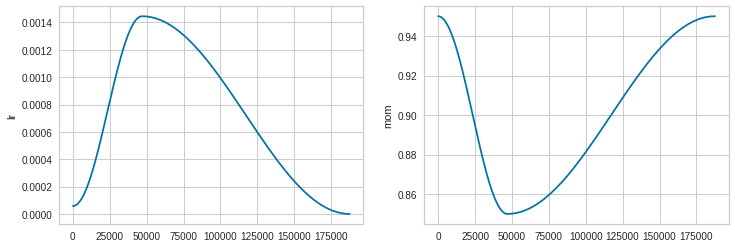

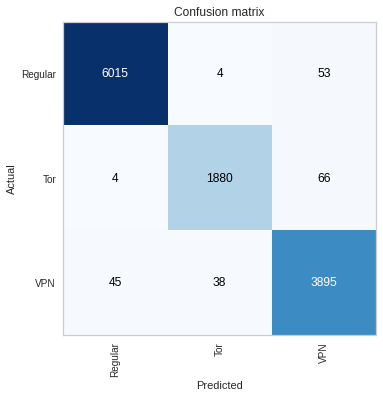

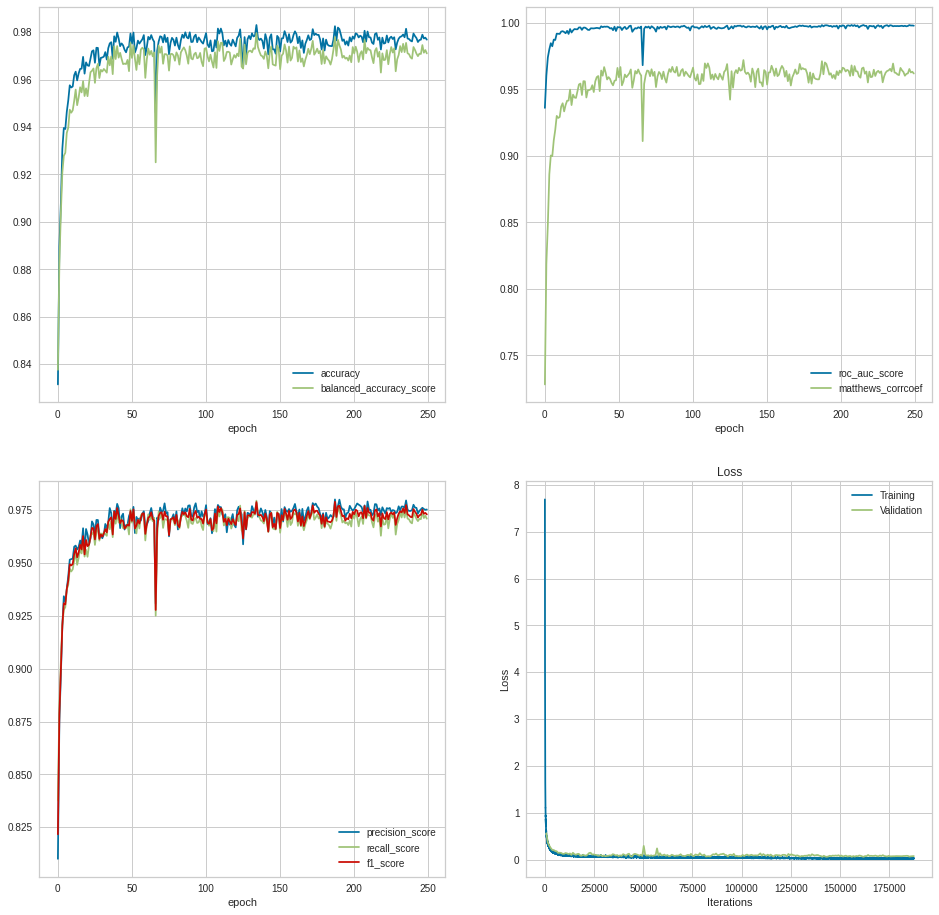

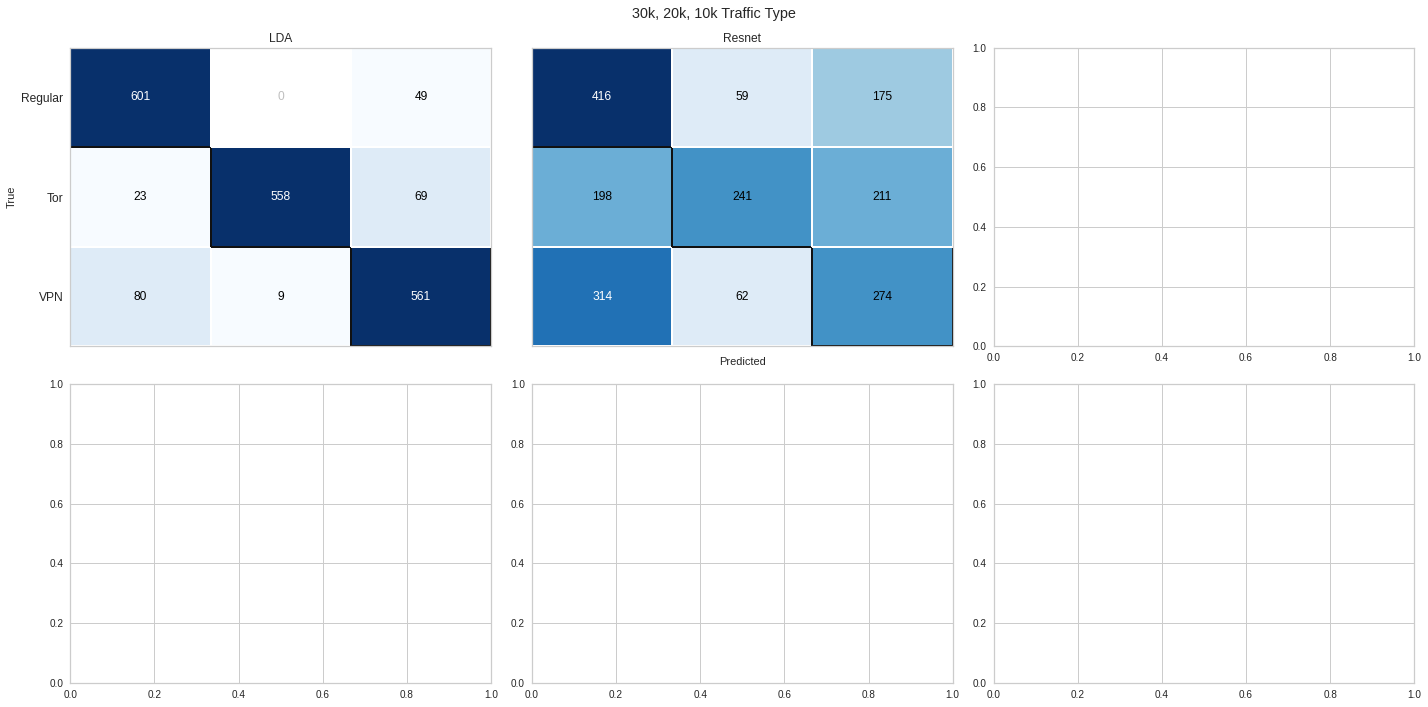

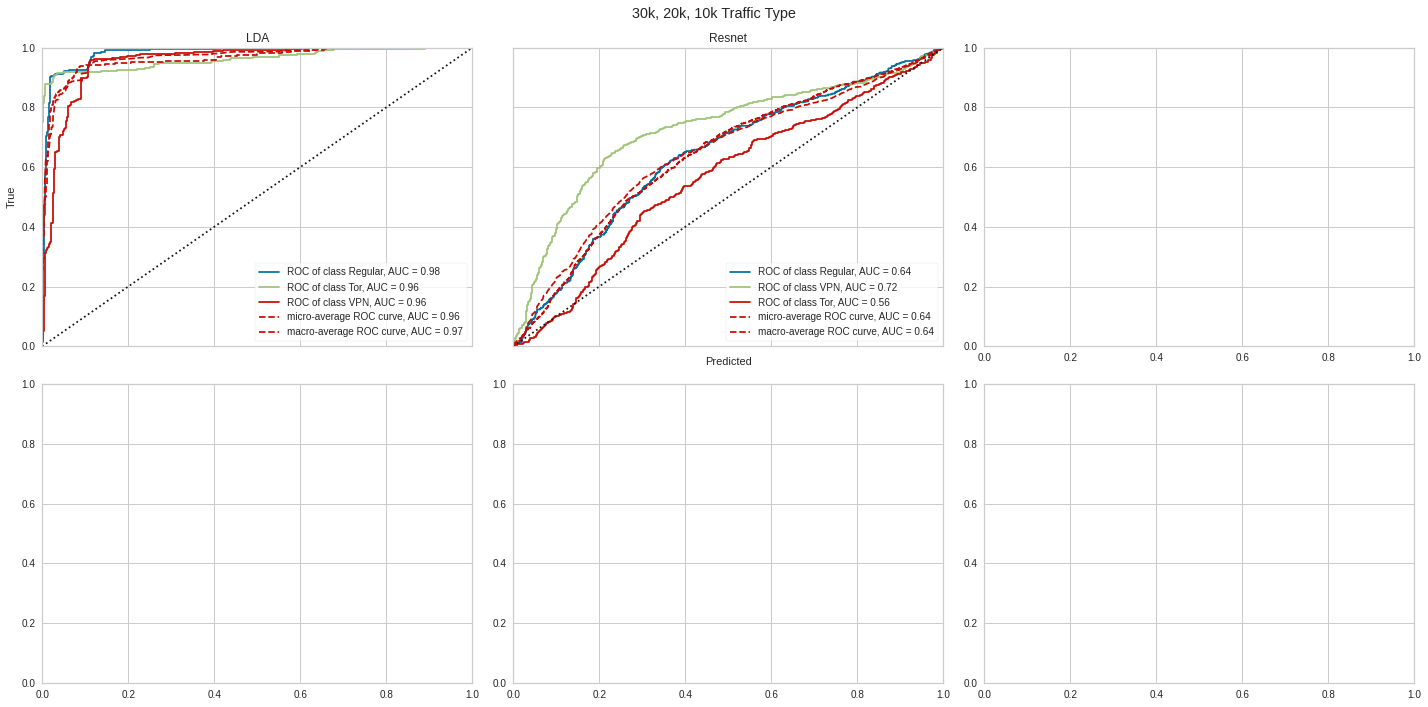

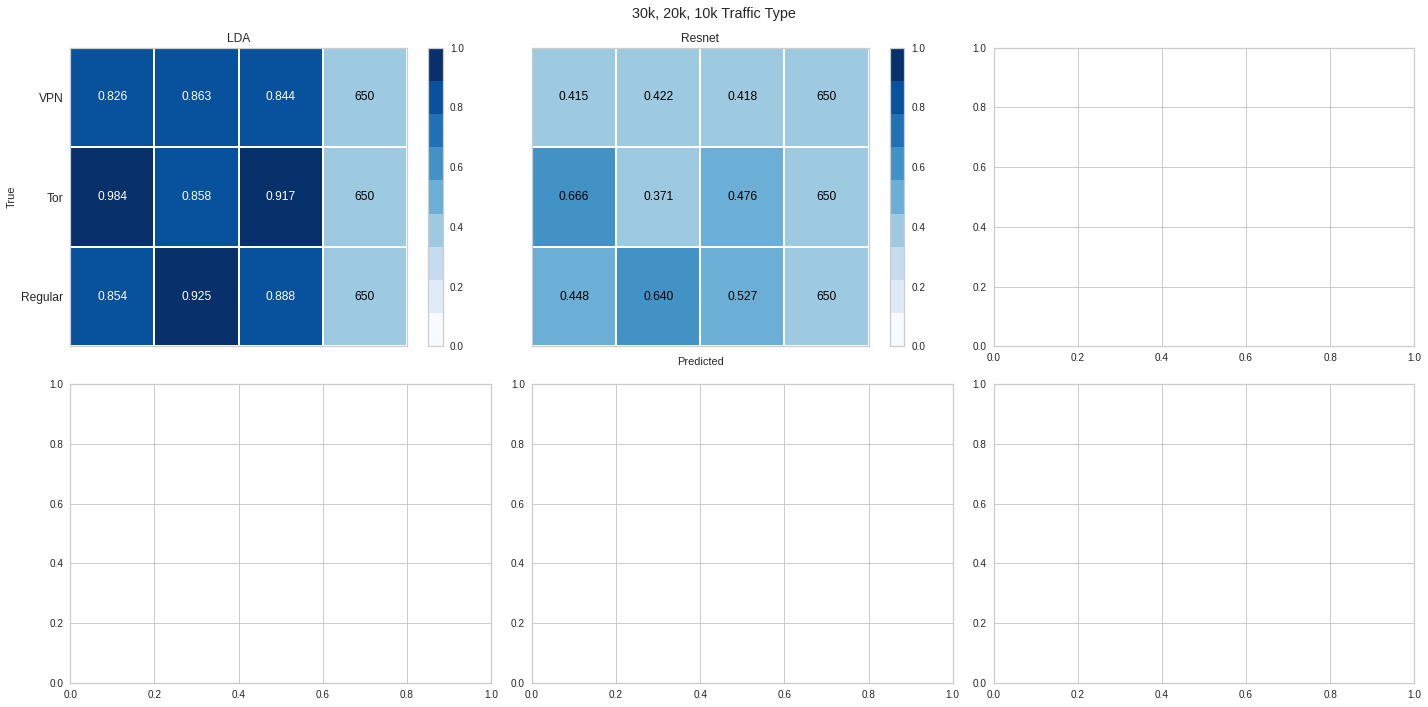

In [31]:
logger_1 = utils.DFLogger()
collector_1 = utils.ModelStatsCallback()
grapher_1 = utils.LazyGraphCallback()
model_saver_1 = utils.SaveModelCallback(monitor='f1_score')
callbacks_1 = [logger_1, grapher_1, model_saver_1, collector_1]

logger_2 = utils.DFLogger()
collector_2 = utils.ModelStatsCallback()
grapher_2 = utils.LazyGraphCallback()
model_saver_2 = utils.SaveModelCallback(monitor='f1_score')
callbacks_2 = [logger_2, grapher_2, model_saver_2, collector_2]

boost_param_grid = {
        
}
rf_param_grid = {
       
}


classifiers = [ utils.LinearDiscriminantAnalysis(), 
                "utils.run_residual_deep_nn_experiment(smote_balanced_traffic_30_20_10['Dataset'], 'Residual Neural Network', 'Traffic Type', list(100 for i in range(40)), epochs=250, callbacks=callbacks_1, no_bar=True)"
               ]

classifier_names = ["LDA", "Resnet"]
shallow_classifiers = ["LDA", "XGBoost", "LightGBM"]
param_grids = [ rf_param_grid, boost_param_grid, boost_param_grid ]

proportional_results = train_and_evaluate_n_classifiers(smote_balanced_traffic_30_20_10['Dataset'], classifiers, "Traffic Type", classifier_names, shallow_classifiers,"30k, 20k, 10k Traffic Type", param_grids, baseline_traffic_test['Dataset'], [callbacks_1, callbacks_2])


# Traffic Classification

### Upsampling to the Majority Class

Results for Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18502
           1       1.00      1.00      1.00     18575
           2       1.00      1.00      1.00     18518

    accuracy                           1.00     55595
   macro avg       1.00      1.00      1.00     55595
weighted avg       1.00      1.00      1.00     55595

	Accuracy: 0.9990466768594298

	F1: 0.9990466096451652

	AUC: 0.9999744191106568

	Mathew's Correlation: 0.9985700496143797

[16:36:53] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Results for XGBoost
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18502
           1       1.00      1.00      1.00     18575
           2       1.00      1.0

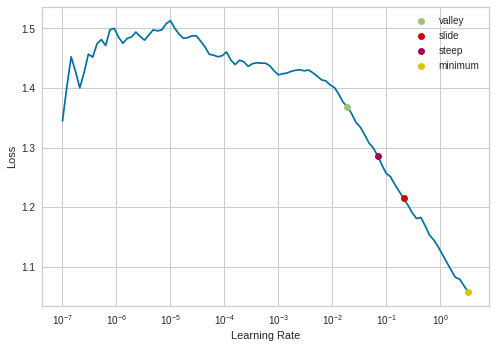

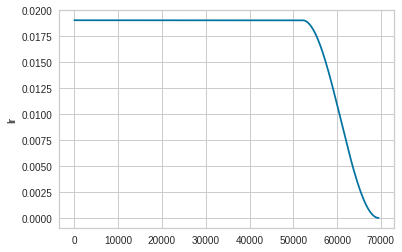

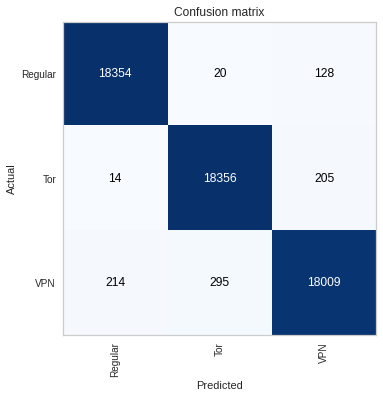

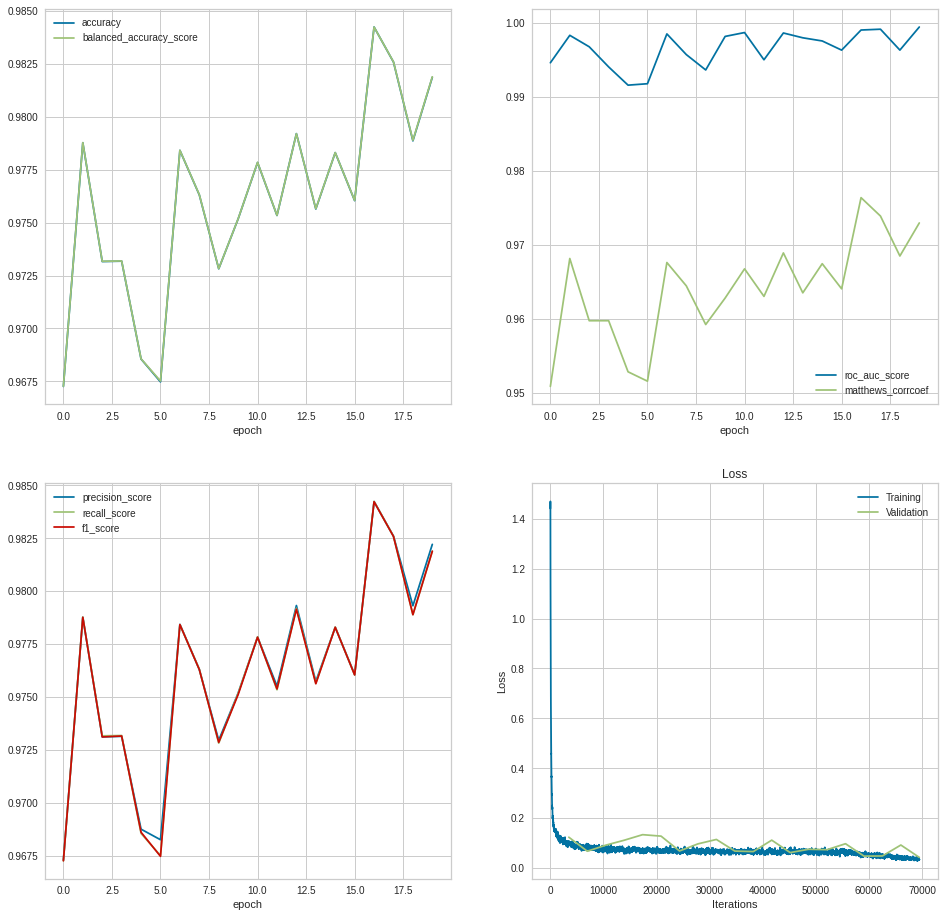

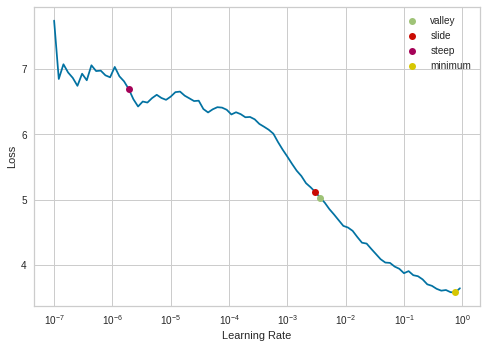

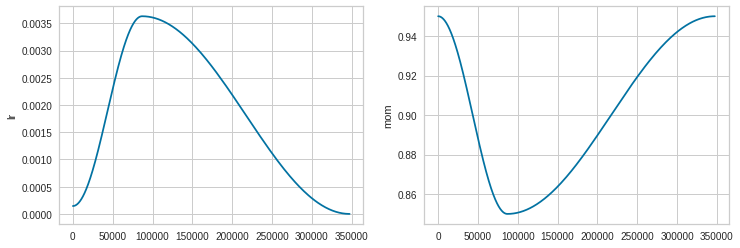

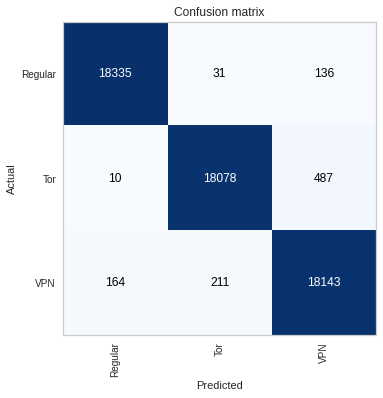

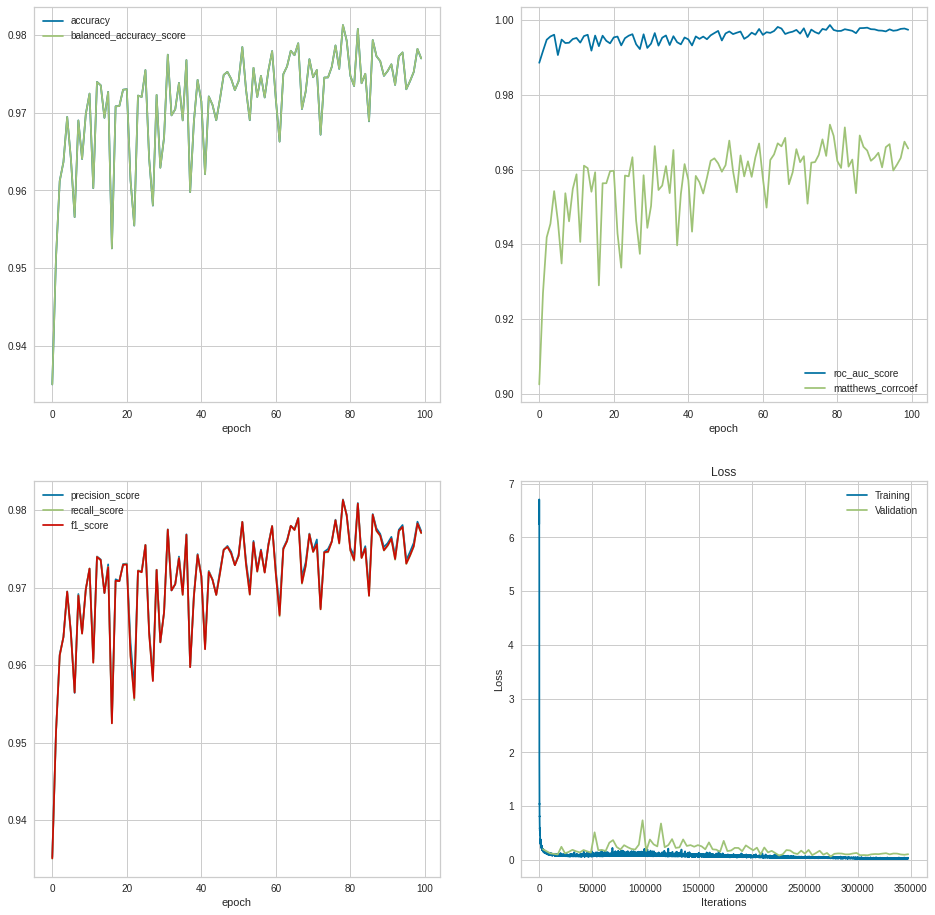

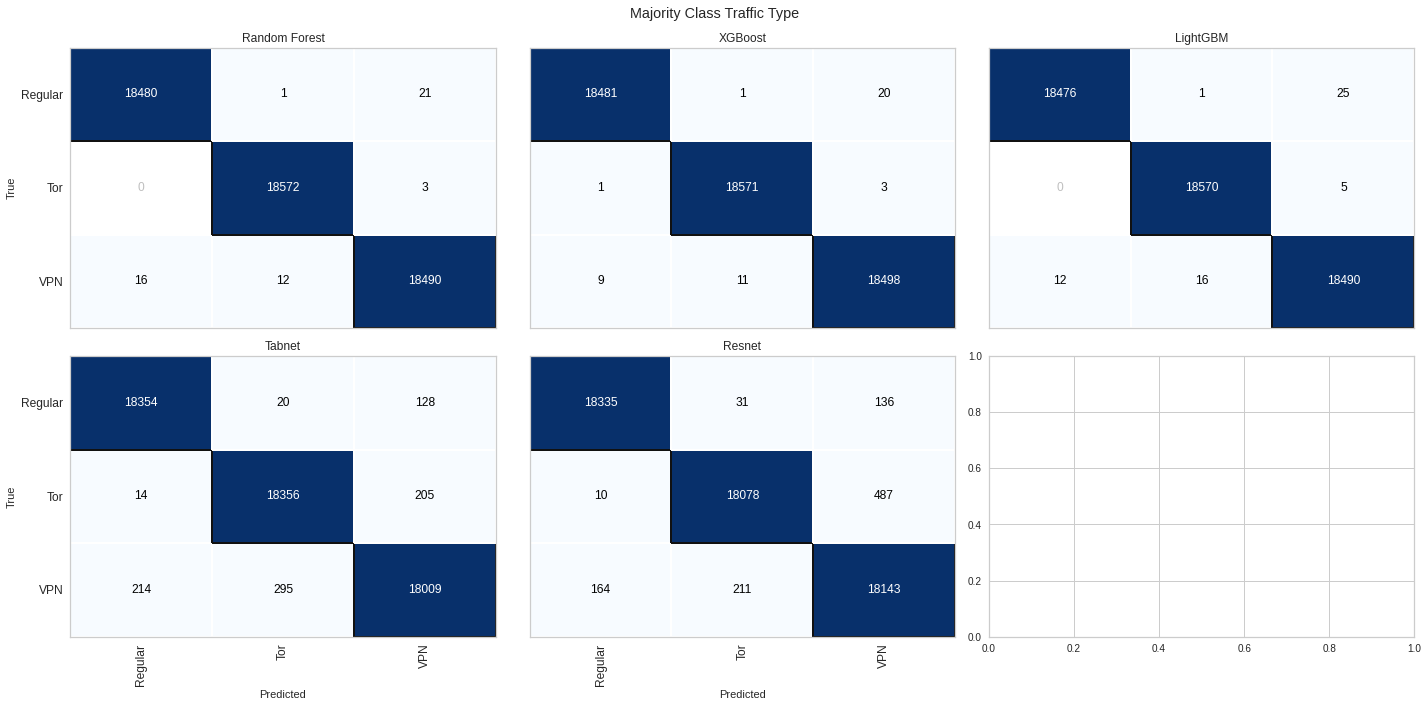

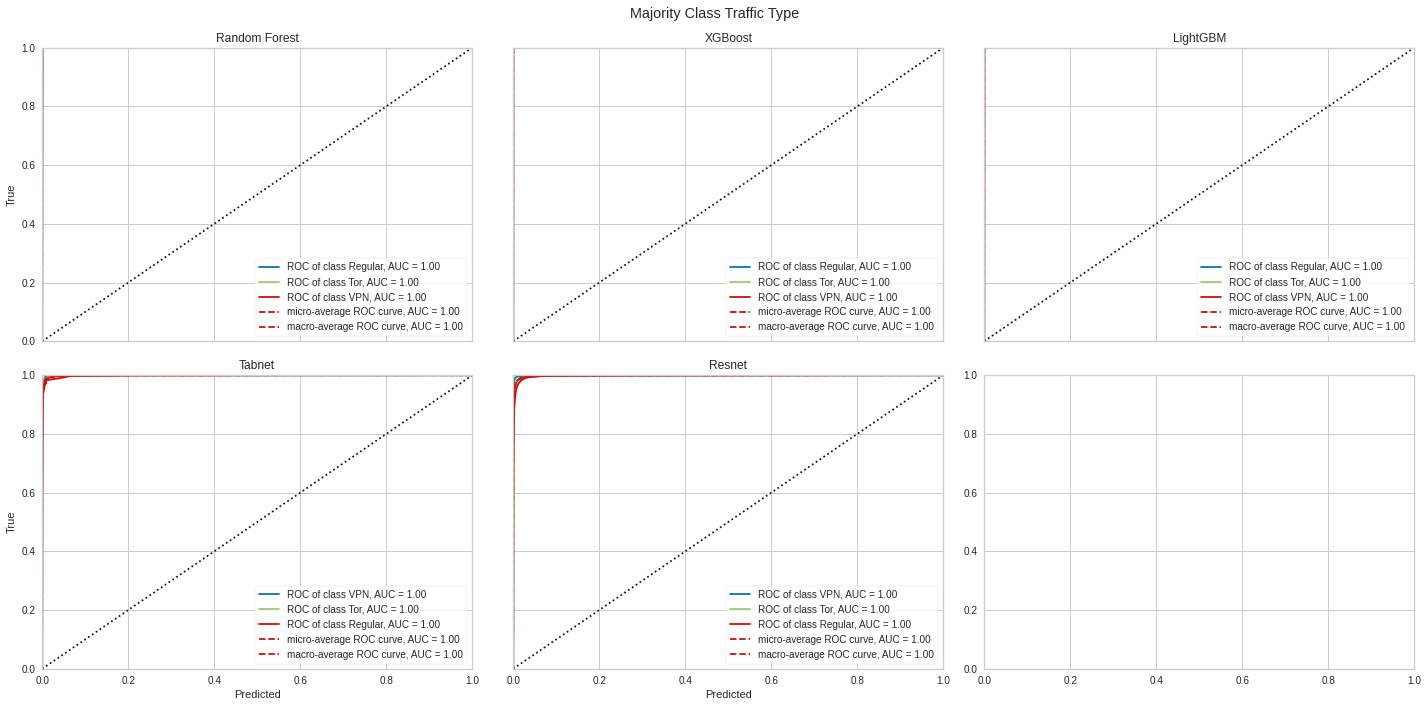

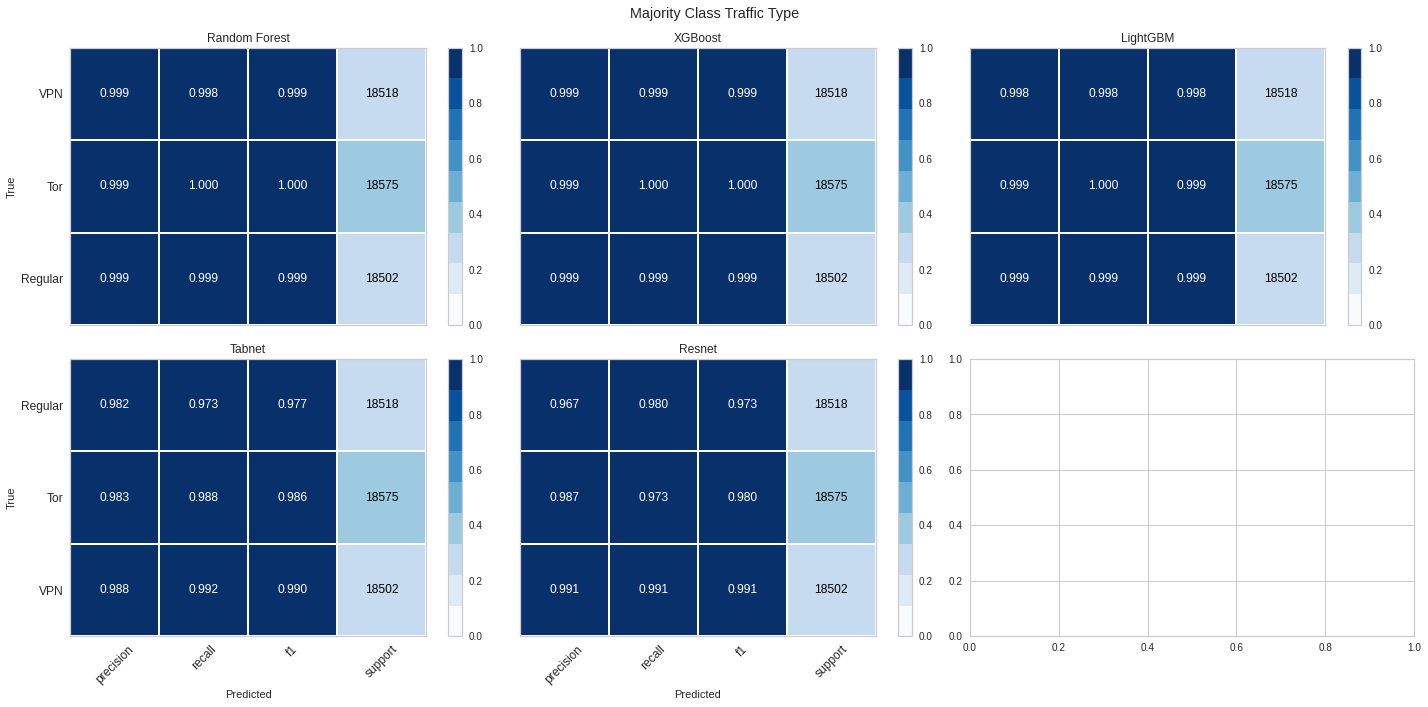

In [66]:
logger_1 = utils.DFLogger()
collector_1 = utils.ModelStatsCallback()
grapher_1 = utils.LazyGraphCallback()
model_saver_1 = utils.SaveModelCallback(monitor='f1_score')
callbacks_1 = [logger_1, grapher_1, model_saver_1, collector_1]

logger_2 = utils.DFLogger()
collector_2 = utils.ModelStatsCallback()
grapher_2 = utils.LazyGraphCallback()
model_saver_2 = utils.SaveModelCallback(monitor='f1_score')
callbacks_2 = [logger_2, grapher_2, model_saver_2, collector_2]


boost_param_grid = {
        "classifier__n_estimators": [100],
        'classifier__max_depth': [2,6,12],
        'classifier__min_child_weight': [4,10],
        "classifier__eval_metric": ["mlogloss"]
}
rf_param_grid = {
        'classifier__n_estimators': [100, 500],
        'classifier__max_features': ['auto', 'sqrt', 'log2'],
}


classifiers = [ utils.RandomForestClassifier(), utils.XGBClassifier(),  utils.LGBMClassifier(),
               "utils.run_tabnet_experiment(smote_balanced_traffic_majority['Dataset'], 'Tabnet', 'Traffic Type', epochs=20, callbacks=callbacks_1, no_bar=True)",
                "utils.run_residual_deep_nn_experiment(smote_balanced_traffic_majority['Dataset'], 'Residual Neural Network', 'Traffic Type', list(100 for i in range(80)), epochs=100, callbacks=callbacks_2, no_bar=True)"
               ]


classifier_names = ["Random Forest", "XGBoost", "LightGBM",  "Tabnet", "Resnet"]
shallow_classifiers = ["Random Forest", "XGBoost", "LightGBM"]
param_grids = [ rf_param_grid, boost_param_grid, boost_param_grid ]
traffic_equal_result = train_and_evaluate_n_classifiers(smote_balanced_traffic_majority['Dataset'], classifiers, "Traffic Type", classifier_names, shallow_classifiers,"Majority Class Traffic Type", param_grids, baseline_traffic_test['Dataset'], [callbacks_1, callbacks_2])

### 30,000 Regular, 20,000 VPN, and 10,000 Tor

Results for Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6072
           1       1.00      1.00      1.00      1950
           2       1.00      1.00      1.00      3978

    accuracy                           1.00     12000
   macro avg       1.00      1.00      1.00     12000
weighted avg       1.00      1.00      1.00     12000

	Accuracy: 0.9984166666666666

	F1: 0.9984168569918135

	AUC: 0.9998748469741446

	Mathew's Correlation: 0.9973945601774704

[04:10:22] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Results for XGBoost
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6072
           1       1.00      1.00      1.00      1950
           2       1.00      1.0

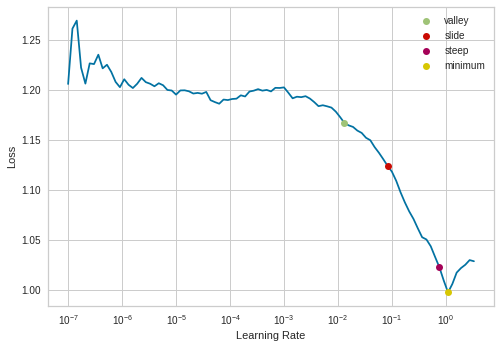

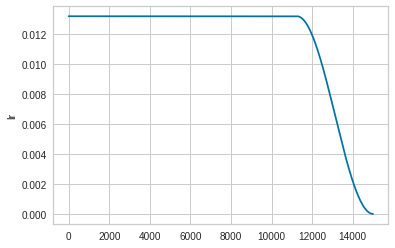

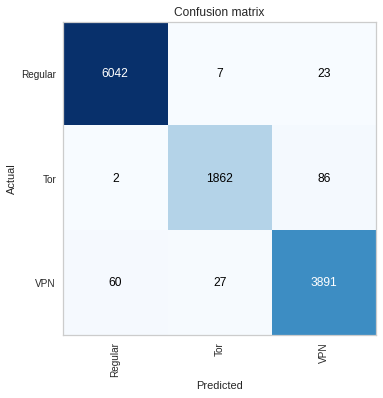

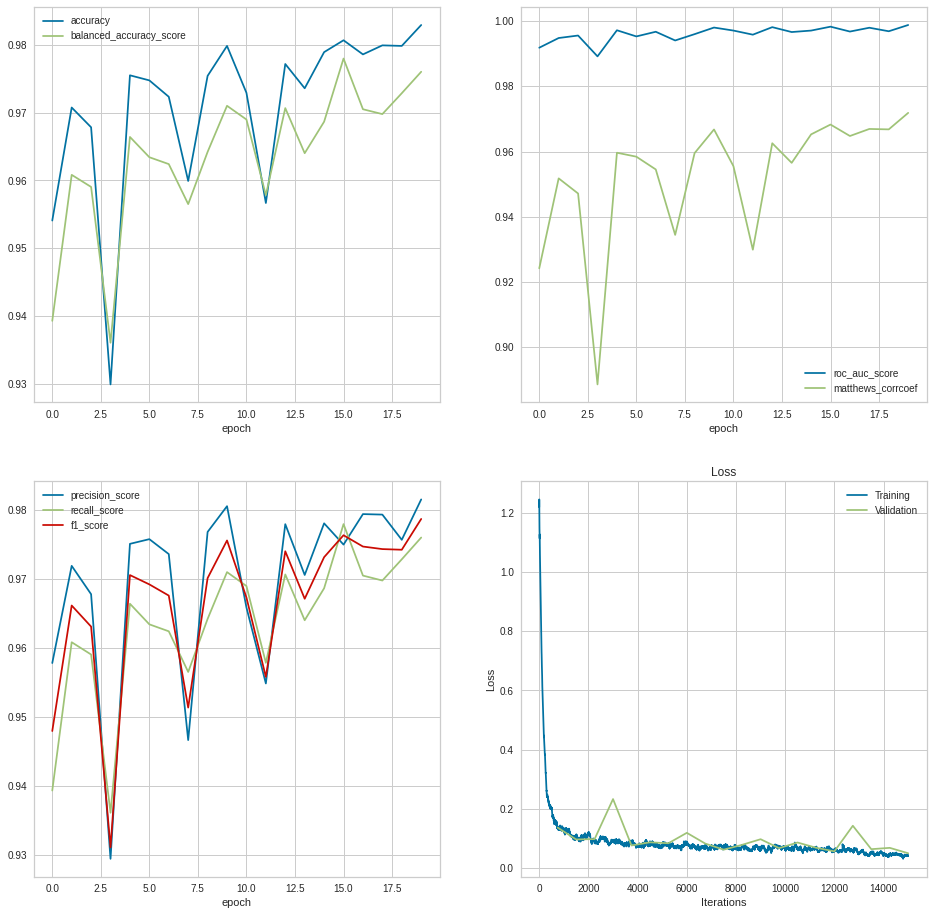

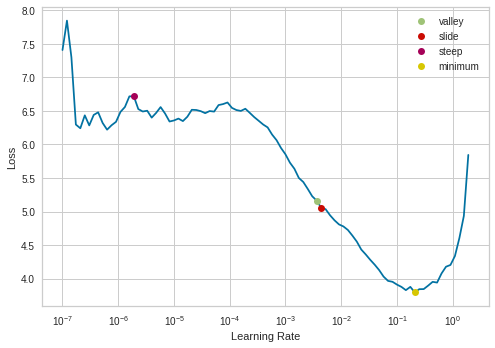

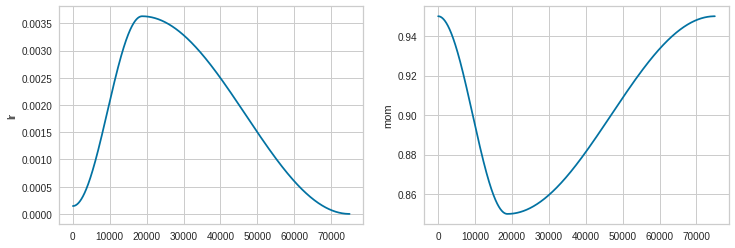

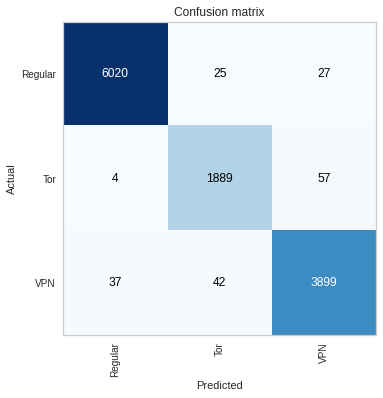

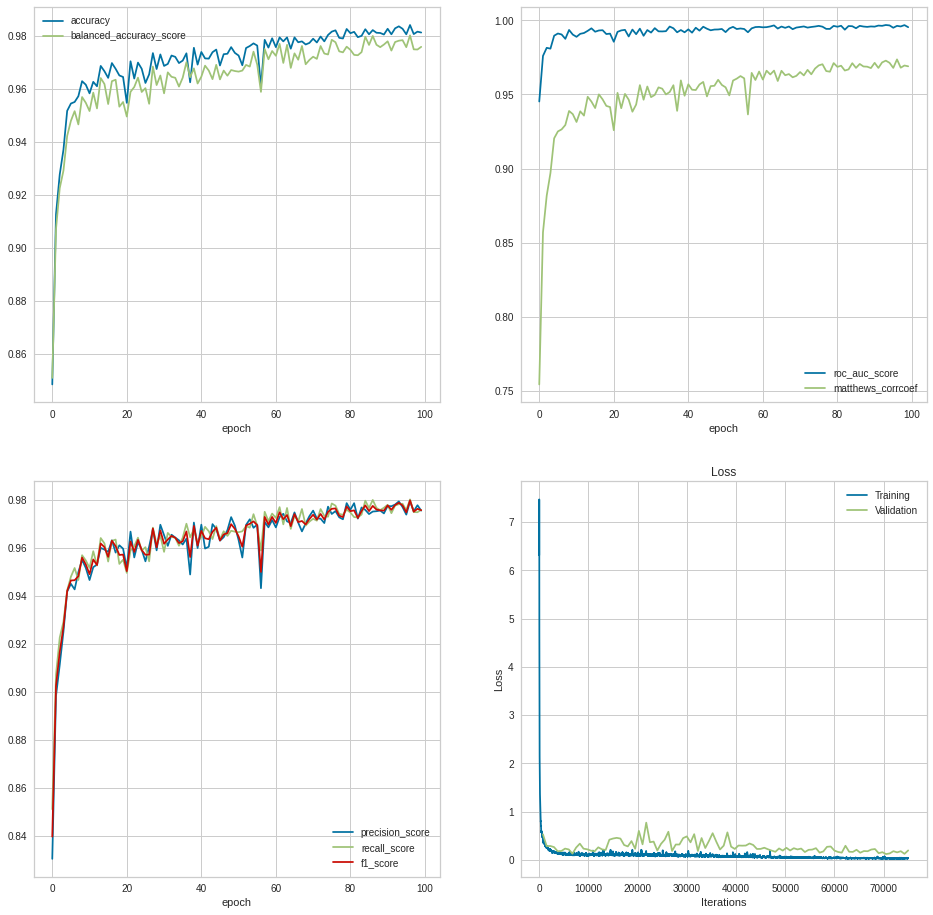

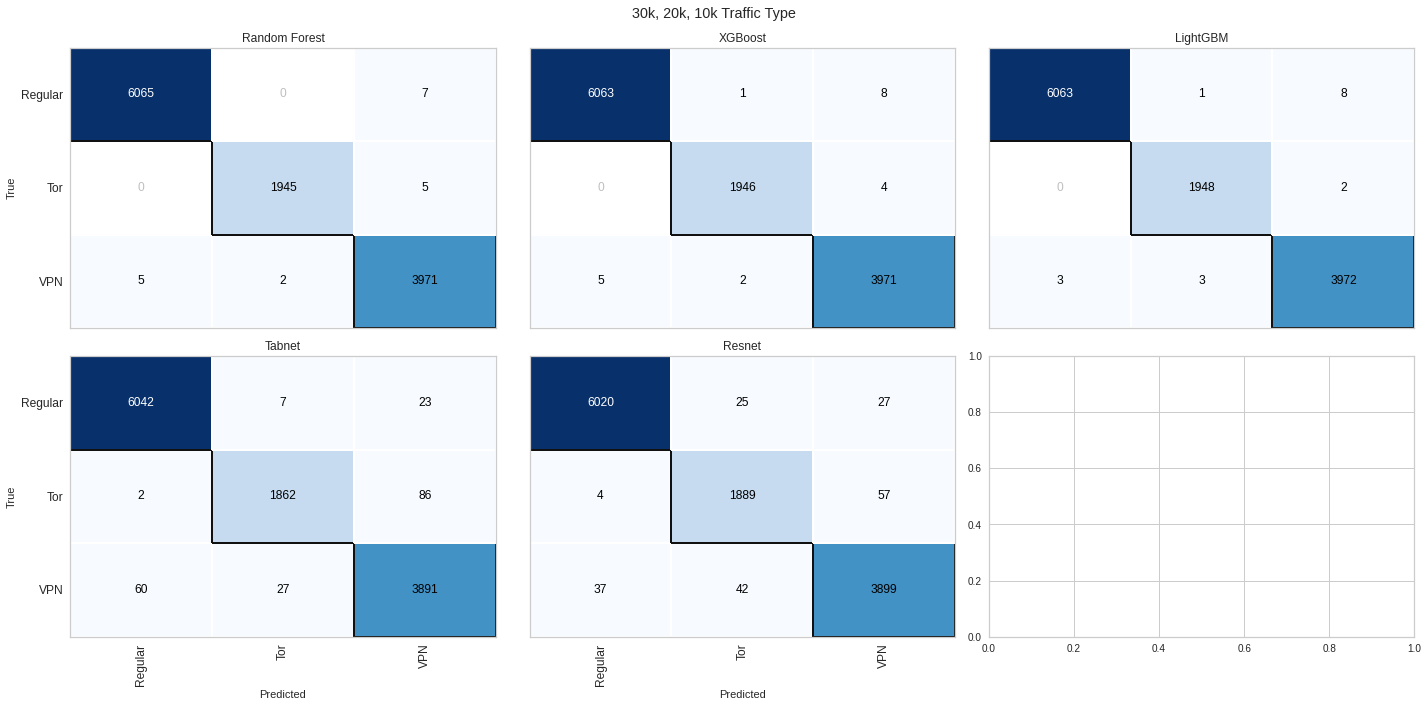

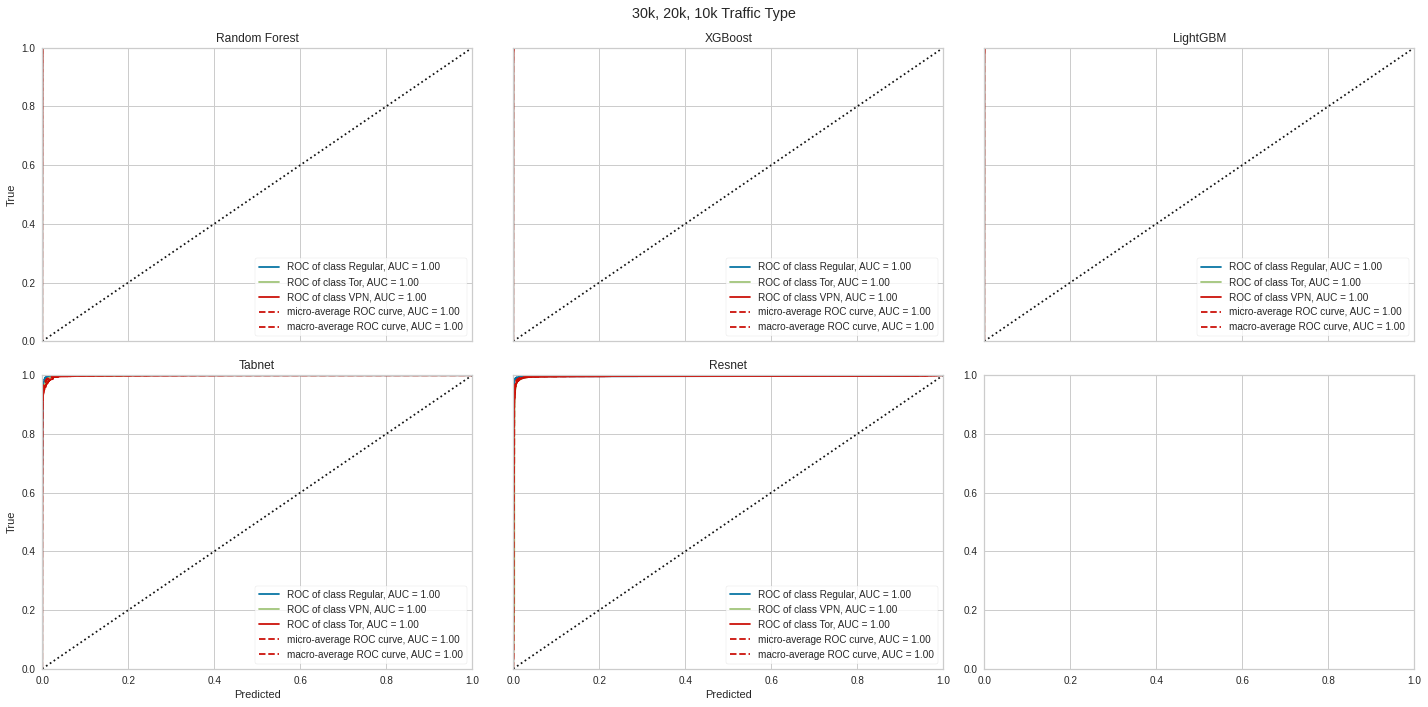

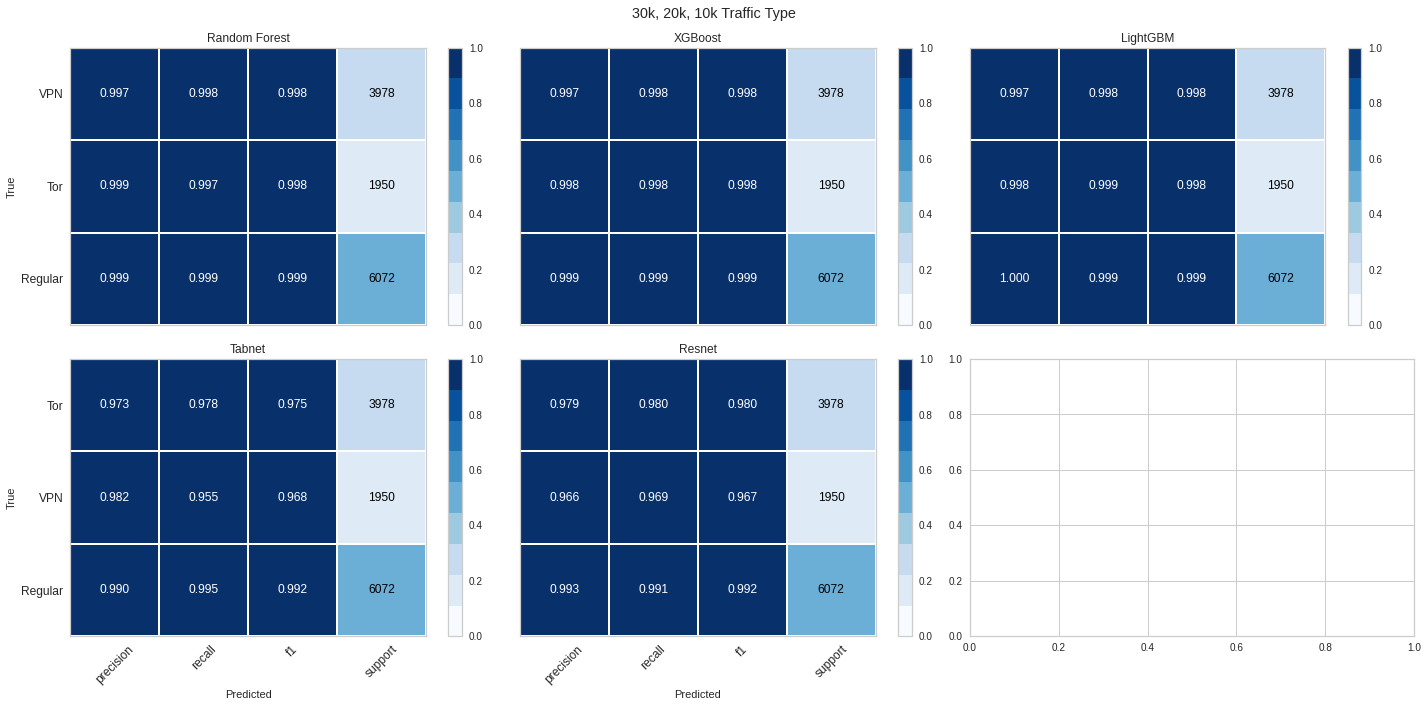

In [67]:
logger_1 = utils.DFLogger()
collector_1 = utils.ModelStatsCallback()
grapher_1 = utils.LazyGraphCallback()
model_saver_1 = utils.SaveModelCallback(monitor='f1_score')
callbacks_1 = [logger_1, grapher_1, model_saver_1, collector_1]

logger_2 = utils.DFLogger()
collector_2 = utils.ModelStatsCallback()
grapher_2 = utils.LazyGraphCallback()
model_saver_2 = utils.SaveModelCallback(monitor='f1_score')
callbacks_2 = [logger_2, grapher_2, model_saver_2, collector_2]


classifiers = [ utils.RandomForestClassifier(), utils.XGBClassifier(),  utils.LGBMClassifier(),
               "utils.run_tabnet_experiment(smote_balanced_traffic_30_20_10['Dataset'], 'Tabnet', 'Traffic Type', epochs=20, callbacks=callbacks_1, no_bar=True)",
                "utils.run_residual_deep_nn_experiment(smote_balanced_traffic_30_20_10['Dataset'], 'Residual Neural Network', 'Traffic Type', list(100 for i in range(80)), epochs=100, callbacks=callbacks_2, no_bar=True)"
               ]

proportional_results = train_and_evaluate_n_classifiers(smote_balanced_traffic_30_20_10['Dataset'], classifiers, "Traffic Type", classifier_names, shallow_classifiers,"30k, 20k, 10k Traffic Type", param_grids, baseline_traffic_test['Dataset'], [callbacks_1, callbacks_2])


# Application Type Classification

### Majority Class

In [68]:
logger_1 = utils.DFLogger()
collector_1 = utils.ModelStatsCallback()
grapher_1 = utils.LazyGraphCallback()
model_saver_1 = utils.SaveModelCallback(monitor='f1_score')
callbacks_1 = [logger_1, grapher_1, model_saver_1, collector_1]

logger_2 = utils.DFLogger()
collector_2 = utils.ModelStatsCallback()
grapher_2 = utils.LazyGraphCallback()
model_saver_2 = utils.SaveModelCallback(monitor='f1_score')
callbacks_2 = [logger_2, grapher_2, model_saver_2, collector_2]

boost_param_grid = {
        "classifier__n_estimators": [100],
        'classifier__max_depth': [2,6,12],
        'classifier__min_child_weight': [4,10],
        "classifier__eval_metric": ["mlogloss"]
}
rf_param_grid = {
        'classifier__n_estimators': [100, 500],
        'classifier__max_features': ['auto', 'sqrt', 'log2'],
}


classifiers = [ utils.RandomForestClassifier(), utils.XGBClassifier(),  utils.LGBMClassifier(),
               "utils.run_tabnet_experiment(smote_balanced_application_majority['Dataset'], 'Tabnet', 'Application Type', epochs=20, callbacks=callbacks_1, no_bar=True)",
                "utils.run_residual_deep_nn_experiment(smote_balanced_application_majority['Dataset'], 'Residual Neural Network', 'Application Type', list(100 for i in range(80)), epochs=100, callbacks=callbacks_2, no_bar=True)"
               ]

classifier_names = ["Random Forest", "XGBoost", "LightGBM",  "Tabnet", "Residual Neural Network"]
shallow_classifiers = ["Random Forest", "XGBoost", "LightGBM"]
param_grids = [ rf_param_grid, boost_param_grid, boost_param_grid ]

majority_class_application_results = train_and_evaluate_n_classifiers(smote_balanced_application_majority['Dataset'], classifiers, "Application Type", classifier_names, shallow_classifiers,"Majority Class Application Type", param_grids, baseline_application_test['Dataset'], [callbacks_1, callbacks_2])

Results for Random Forest
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      9716
           1       0.86      0.92      0.89      9373
           2       0.99      0.97      0.98      9618
           3       0.98      0.99      0.99      9513
           4       0.94      0.90      0.92      9674
           5       0.98      0.95      0.97      9655
           6       0.93      0.94      0.93      9629
           7       1.00      1.00      1.00      9654

    accuracy                           0.96     76832
   macro avg       0.96      0.96      0.96     76832
weighted avg       0.96      0.96      0.96     76832

	Accuracy: 0.9565415451895044

	F1: 0.956793415455603

	AUC: 0.9978721326684251

	Mathew's Correlation: 0.9504084107115385

[06:56:12] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set e

### 30,000 Each Type

Results for Random Forest
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      5982
           1       0.85      0.92      0.89      5979
           2       0.98      0.97      0.98      5894
           3       0.98      0.99      0.99      6042
           4       0.93      0.89      0.91      6062
           5       0.98      0.95      0.96      6017
           6       0.92      0.92      0.92      5930
           7       0.99      1.00      1.00      6094

    accuracy                           0.95     48000
   macro avg       0.95      0.95      0.95     48000
weighted avg       0.95      0.95      0.95     48000

	Accuracy: 0.9510833333333333

	F1: 0.9513122005897532

	AUC: 0.9969488940366721

	Mathew's Correlation: 0.9441857123932379

[06:25:44] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set 

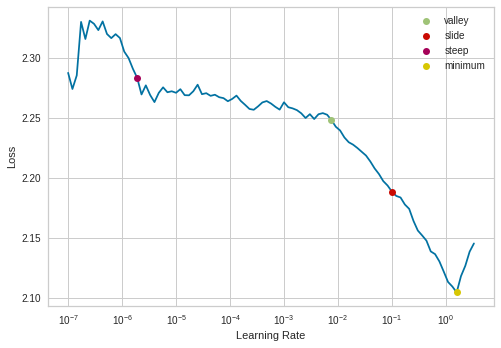

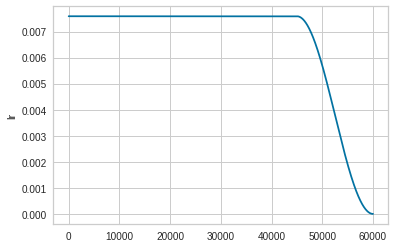

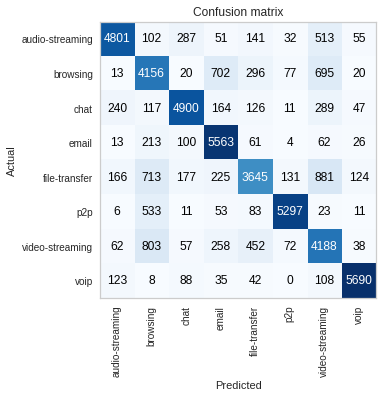

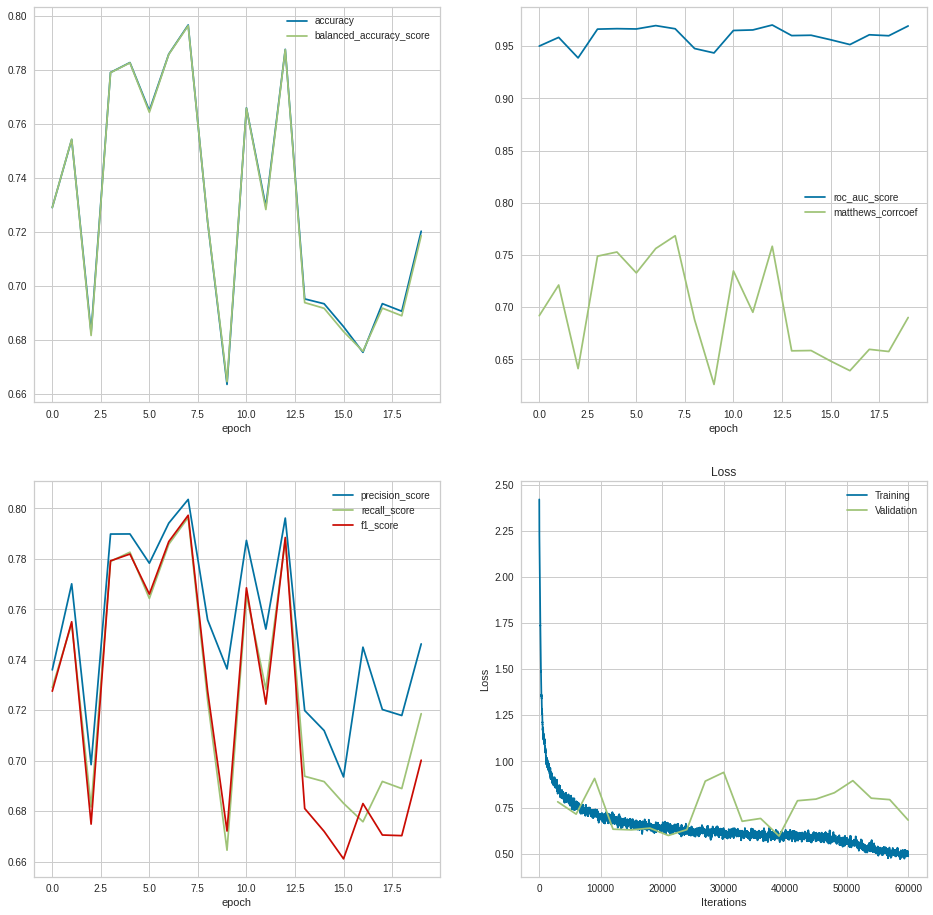

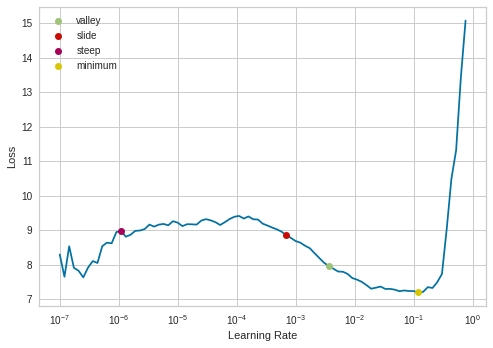

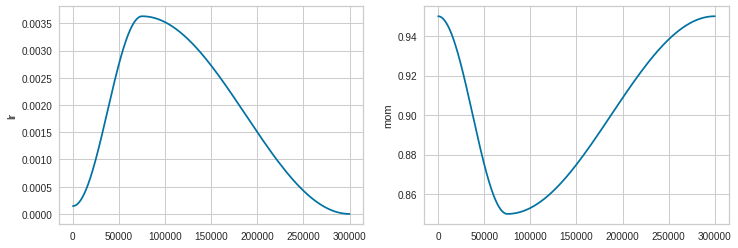

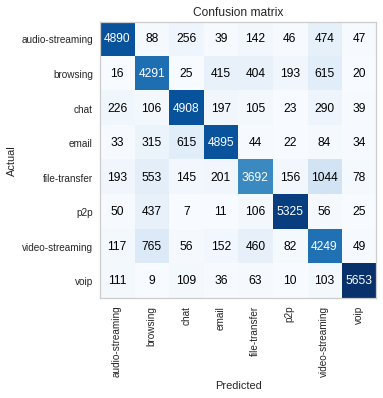

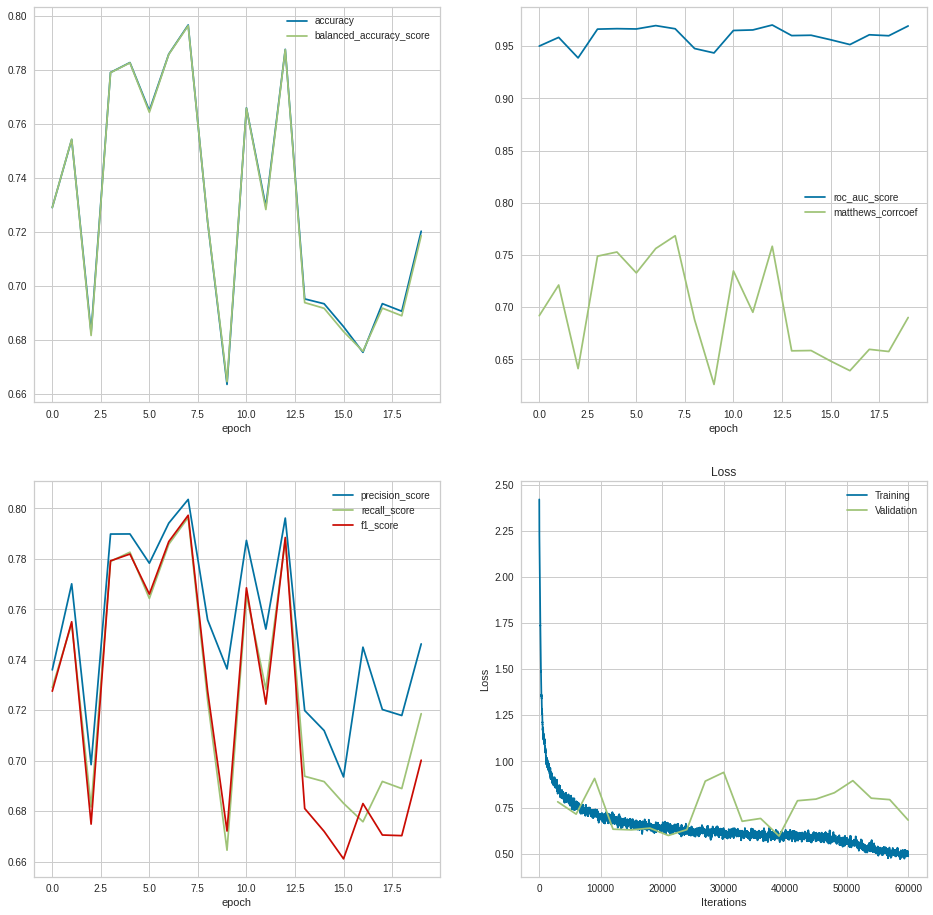

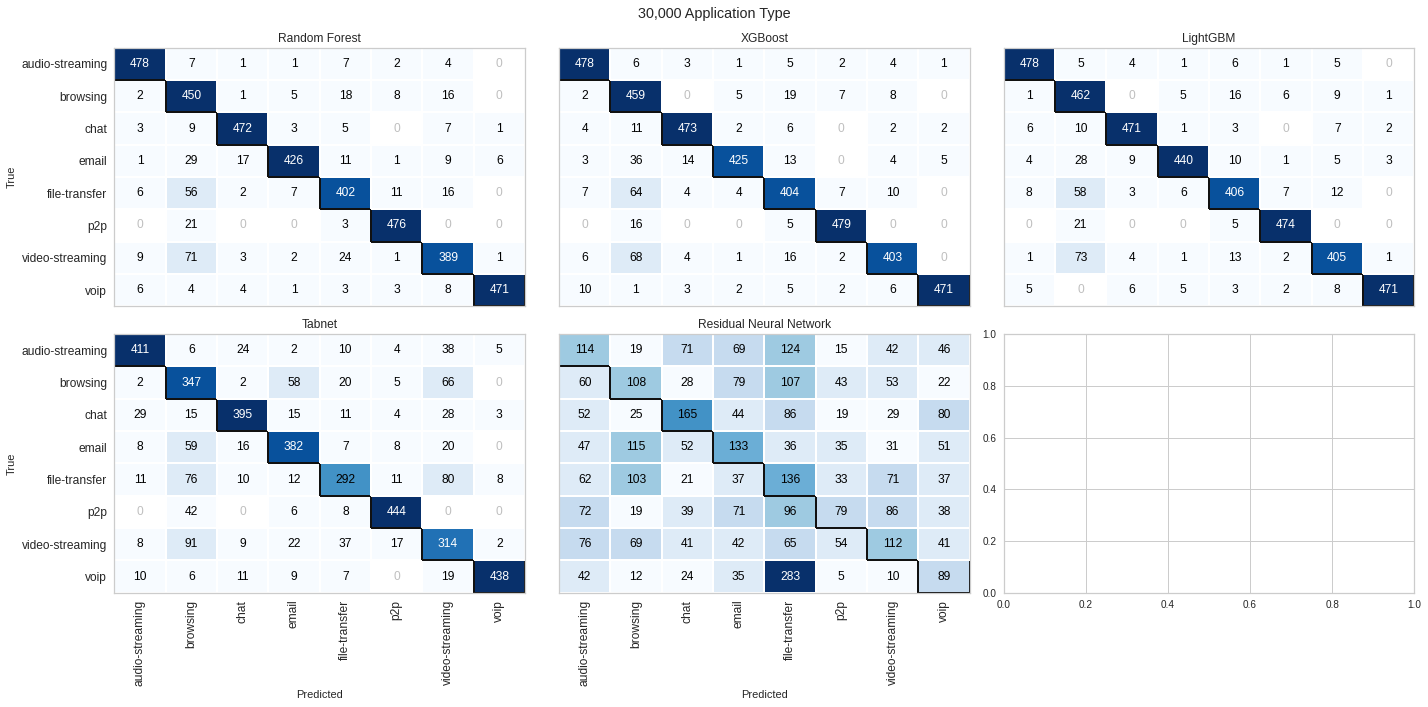

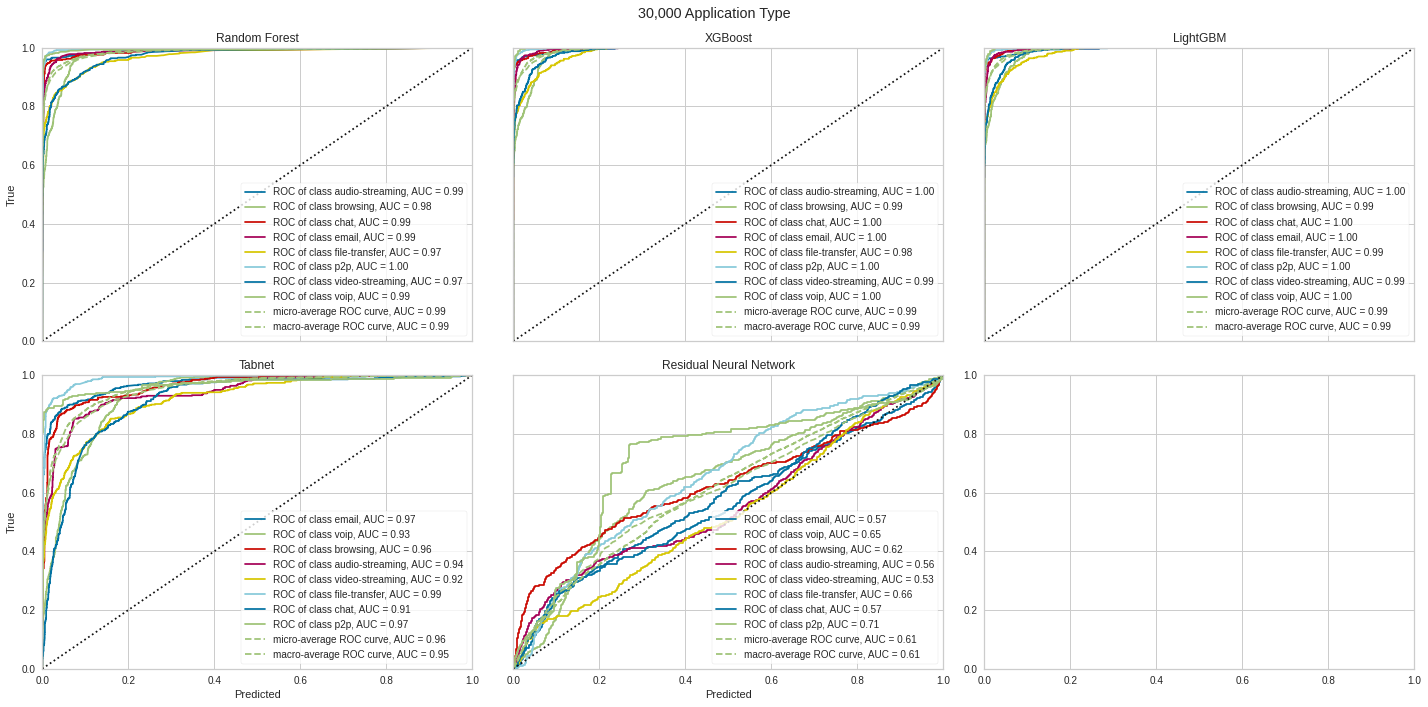

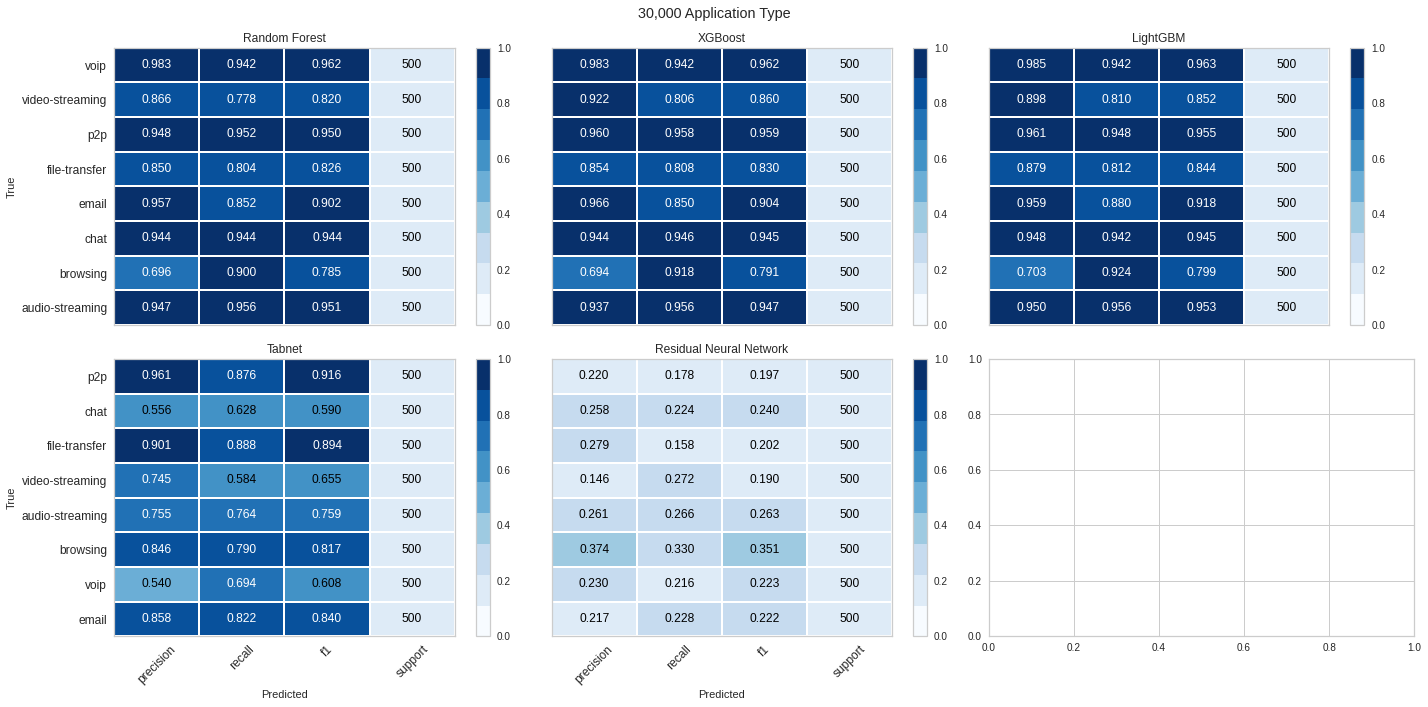

In [ ]:
logger_1 = utils.DFLogger()
collector_1 = utils.ModelStatsCallback()
grapher_1 = utils.LazyGraphCallback()
model_saver_1 = utils.SaveModelCallback(monitor='f1_score')
callbacks_1 = [logger_1, grapher_1, model_saver_1, collector_1]

logger_2 = utils.DFLogger()
collector_2 = utils.ModelStatsCallback()
grapher_2 = utils.LazyGraphCallback()
model_saver_2 = utils.SaveModelCallback(monitor='f1_score')
callbacks_2 = [logger_2, grapher_2, model_saver_2, collector_2]

boost_param_grid = {
        "classifier__n_estimators": [100],
        'classifier__max_depth': [2,6,12],
        'classifier__min_child_weight': [4,10],
        "classifier__eval_metric": ["mlogloss"]
}
rf_param_grid = {
        'classifier__n_estimators': [100, 500],
        'classifier__max_features': ['auto', 'sqrt', 'log2'],
}


classifiers = [ utils.RandomForestClassifier(), utils.XGBClassifier(),  utils.LGBMClassifier(),
               "utils.run_tabnet_experiment(smote_balanced_application_30_30_30['Dataset'], 'Tabnet', 'Application Type', epochs=20, callbacks=callbacks_1, no_bar=True)",
                "utils.run_residual_deep_nn_experiment(smote_balanced_application_30_30_30['Dataset'], 'Residual Neural Network', 'Application Type', list(100 for i in range(80)), epochs=100, callbacks=callbacks_2, no_bar=True)"
               ]

equal_application_results = train_and_evaluate_n_classifiers(smote_balanced_application_30_30_30['Dataset'], classifiers, "Application Type", classifier_names, shallow_classifiers,"30,000 Application Type", param_grids, baseline_application_test['Dataset'], [callbacks_1, callbacks_2])

In [ ]:
print(f'Last Execution: {utils.datetime.datetime.now()}')
assert False, 'Nothing after this point is included in the study'